<a href="https://colab.research.google.com/github/MiguelAngelDLA/Notebooks_TallerIA_AD2024/blob/main/Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresiones Lineales y Polinomiales

En este notebook, exploraremos dos tipos de regresiones comunes: la regresión lineal y la regresión polinomial.

## Regresión Lineal

La regresión lineal se utiliza para modelar la relación entre una variable dependiente (Y) y una variable independiente (X). El objetivo es encontrar la línea recta que mejor se ajuste a los datos.

La fórmula de una regresión lineal simple es la siguiente:

## $Y = \beta_0 + \beta_1 X + \epsilon$

Donde:
- $Y$ es la variable dependiente.
- $X$ es la variable independiente.
- $b_0$ es la intersección en el eje Y (término independiente).
- $b_1$ es la pendiente de la línea (el coeficiente de regresión).

## Regresión Polinomial

La regresión polinomial se utiliza cuando los datos no pueden ser ajustados correctamente por una línea recta. En su lugar, se utiliza una curva polinomial para ajustar los datos.

La fórmula de una regresión polinomial de grado 2 es la siguiente:

## $Y = b_0 + b_1X + b_2X^2\$

Donde el término adicional \(b_2X^2\) permite que el modelo se ajuste a relaciones no lineales.


## Ejemplo con Python

Vamos a implementar ejemplos de regresión lineal y polinomial usando `numpy`, `pandas`, y `scikit-learn`.

In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Crear un conjunto de datos ficticio

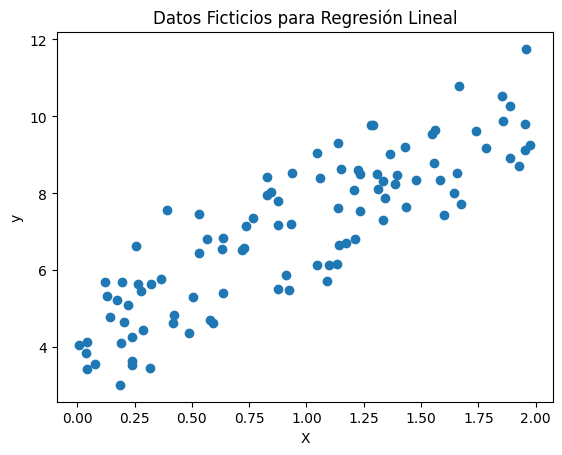

In [2]:
# Datos ficticios
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Visualizar los datos
plt.scatter(X, y)
plt.title('Datos random para Regresión Lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

- `np.random.seed(0)`: Establece una semilla para el generador de números aleatorios, garantizando que los resultados sean reproducibles cada vez que se ejecute el código.
  
- `X = 2 * np.random.rand(100, 1)`: Genera 100 valores aleatorios de $X$ en un rango de 0 a 2, representando la variable independiente.

- `y = 4 + 3 * X + np.random.randn(100, 1)`: Genera la variable dependiente $y $ utilizando una relación lineal con $X$. La fórmula $y = 4 + 3X + \text{ruido}$ simula una relación lineal con pendiente 3 y una intersección en 4, agregando un componente de ruido aleatorio que introduce variabilidad, similar a lo que se observa en datos reales.


### Regresión Lineal

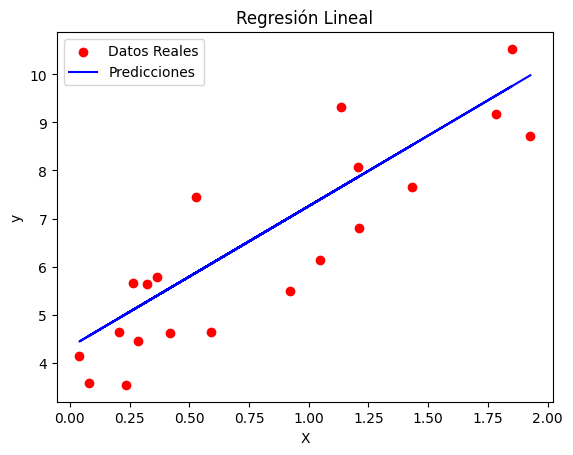

Coeficiente de determinación R2: 0.74
Error Cuadrático Medio: 1.04


In [3]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predecir
y_pred = lin_reg.predict(X_test)

# Graficar los resultados
plt.scatter(X_test, y_test, color='red', label='Datos Reales')
plt.plot(X_test, y_pred, color='blue', label='Predicciones')
plt.title('Regresión Lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Evaluar el modelo
print(f"Coeficiente de determinación R2: {r2_score(y_test, y_pred):.2f}")
print(f"Error Cuadrático Medio: {mean_squared_error(y_test, y_pred):.2f}")


Este código divide los datos en conjuntos de entrenamiento y prueba, entrena un modelo de regresión lineal y luego realiza predicciones sobre los datos de prueba.

`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)`

- `train_test_split`: Esta función divide los datos en dos conjuntos: uno para entrenar el modelo (`X_train`, `y_train`) y otro para probarlo (`X_test`, `y_test`).

- `test_size=0.2`: Indica que el 20% de los datos se utilizarán para el conjunto de prueba, mientras que el 80% se usarán para entrenar el modelo.

- `random_state=0`: Establece una semilla para la división aleatoria, asegurando que la partición sea reproducible.


## Métricas de Evaluación: MAE, MSE y RMSE

En modelos de regresión, es fundamental evaluar qué tan bien el modelo predice los valores esperados. A continuación, se describen tres métricas comunes: MAE, MSE y RMSE.

1. **Error Absoluto Medio (MAE - Mean Absolute Error)**
   El MAE mide el promedio de los errores absolutos entre las predicciones del modelo y los valores reales. Es una métrica fácil de interpretar ya que refleja el error promedio en las mismas unidades que los datos.

    **Fórmula**:
   
   ## $ MAE  = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i $

     Donde:
     - $y_i$ es el valor real.
     - $\hat{y}_i$ es el valor predicho.
     - $n$ es el número total de observaciones.
   - **Interpretación**: Un MAE más bajo indica un modelo con predicciones más precisas.

2. **Error Cuadrático Medio (MSE - Mean Squared Error)**
   - **Descripción**: El MSE calcula el promedio de los errores cuadrados entre las predicciones y los valores reales. Al elevar los errores al cuadrado, penaliza más los errores grandes, lo que puede ser útil si se desea evitar grandes discrepancias.


  - **Fórmula**:

   ## $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

   - **Interpretación**: Un MSE bajo indica que las predicciones del modelo son cercanas a los valores reales. Sin embargo, debido a la penalización cuadrática, puede ser más sensible a outliers (osease, [valores atípicos](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico)).

3. **Raíz del Error Cuadrático Medio (RMSE - Root Mean Squared Error)**
   - **Descripción**: El RMSE es la raíz cuadrada del MSE. Se interpreta en las mismas unidades que los datos originales, facilitando su comprensión.
   - **Fórmula**:
     
     $\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$
   - **Interpretación**: Un RMSE bajo indica que las predicciones del modelo están, en promedio, cerca de los valores reales, al igual que el MSE, pero es más intuitivo gracias a sus unidades.

### Comparación de las Métricas
- **MAE** es menos sensible a los outliers en comparación con el **MSE** y **RMSE**.
- **MSE** y **RMSE** penalizan más los errores grandes debido a la elevación al cuadrado, lo que puede ser útil si se busca minimizar los errores más significativos.
- **RMSE** es a menudo preferido porque mantiene las unidades originales, lo que facilita la interpretación de los resultados.

Estas métricas proporcionan diferentes perspectivas sobre el rendimiento de un modelo de regresión y se deben elegir en función de los objetivos específicos del análisis.


### Regresión Polinomial

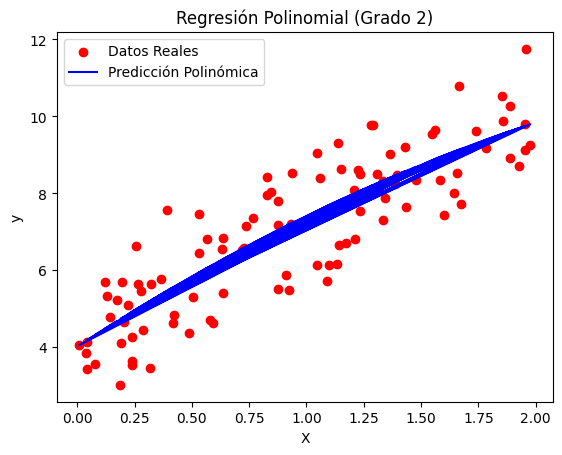

Coeficiente de determinación R2 (Polinomial): 0.75
Error Cuadrático Medio (Polinomial): 1.03


In [4]:
# Transformar los datos a una forma polinómica (en este caso grado 2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)

# Graficacion time
plt.scatter(X, y, color='red', label='Datos Reales')
plt.plot(X, poly_reg.predict(poly_features.transform(X)), color='blue', label='Predicción Polinómica')
plt.title('Regresión Polinomial (Grado 2)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Evaluar el modelo
print(f"Coeficiente de determinación R2 (Polinomial): {r2_score(y_test, y_pred_poly):.2f}")
print(f"Error Cuadrático Medio (Polinomial): {mean_squared_error(y_test, y_pred_poly):.2f}")